# Pymaceuticals Inc. new submission 
---

### Analysis
Capomulin and Ramicane show the lowest average tumor volumes among the treatment regimens, 
suggesting these drugs may be the most effective in reducing tumor growth.

Infubinol shows an outlier in the final tumor volume distribution, indicating that while it may be effective in some cases, 
there are instances where it fails to control tumor growth effectively.

A strong positive correlation (0.84) is observed between mouse weight and tumor volume for the Capomulin regimen, 
suggesting that heavier mice tend to have larger tumor volumes during the treatment.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
#Checking the number of rows in the dataframe
len(combined_data["Mouse ID"])

1893

In [3]:
# Checking the number of mice.
combined_data["Mouse ID"].unique().size


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = combined_data.loc[combined_data["Mouse ID"]=="g989", :]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Checking the number of rows in the dataframe.
len(duplicate_mice_df["Mouse ID"])

13

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_data[combined_data["Mouse ID"] != 'g989']
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
#Checking the number of rows in the dataframe to see that the duplicated rows are dropped, 
# and the total amount is 1880 (Because 1893 - 13 = 1880)
len(clean_mouse_df["Mouse ID"])

1880

In [9]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].unique().size

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group data by Drug Regimen
grouped_drug_df = clean_mouse_df.groupby("Drug Regimen")

# Calculate summary statistics for Tumor Volume
sum_stat = pd.DataFrame({
    "Mean Tumor Volume": grouped_drug_df["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": grouped_drug_df["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": grouped_drug_df["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": grouped_drug_df["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.": grouped_drug_df["Tumor Volume (mm3)"].sem()
})

sum_stat


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_aggragate = clean_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
sum_aggragate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Observed Mice per Drug Regimen')

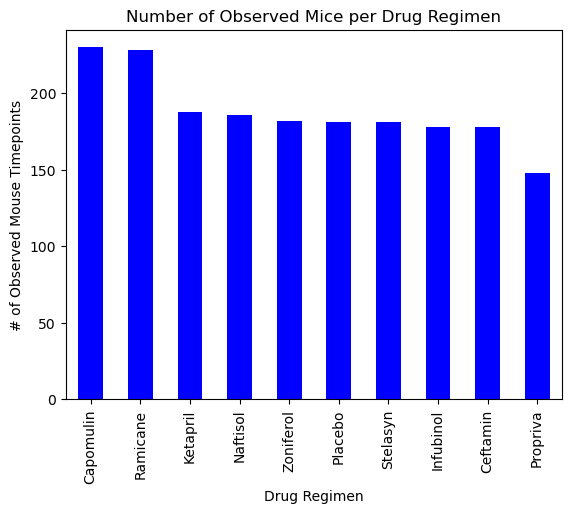

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create the bar graph
bar_plot = clean_mouse_df["Drug Regimen"].value_counts().plot.bar(color="b")
#Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Mice per Drug Regimen")

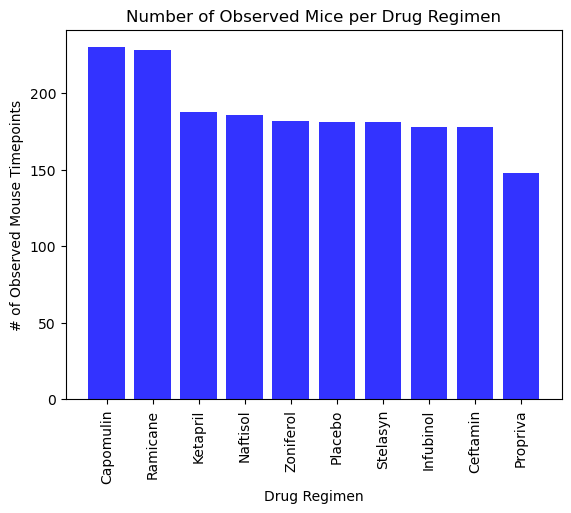

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Create the x and y axis
x_axis = clean_mouse_df["Drug Regimen"].value_counts().index.values
y_axis = clean_mouse_df["Drug Regimen"].value_counts().values
#Create the bar graph
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align="center")
#Add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Observed Mice per Drug Regimen")
#Make the x axis labels be shown vertically
plt.xticks(rotation="vertical")
#Display the graph
plt.show()

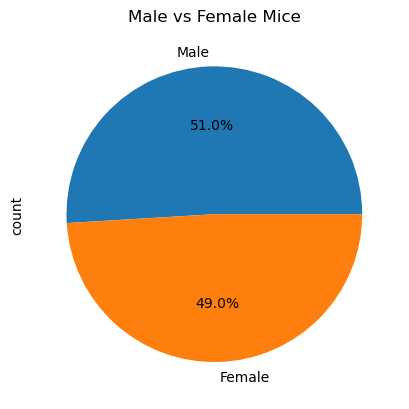

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_mouse_df["Sex"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Male vs Female Mice")
plt.show()

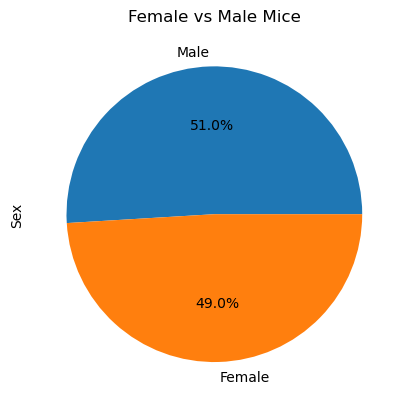

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = clean_mouse_df["Sex"].value_counts()
plot = clean_mouse_df["Sex"].value_counts().plot.pie(y="Total Count", autopct="%1.1f%%")
plt.title("Female vs Male Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time = clean_mouse_df.groupby(["Mouse ID"]).max(["Timepoint"])
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_time_merge_df = pd.merge(clean_mouse_df, last_time, on=("Mouse ID", "Timepoint"), how="inner", suffixes=(" ", "_y") )
#Drop the duplicated columns
last_time_merge_df.drop(last_time_merge_df.filter(regex="_y$").columns, axis=1, inplace=True)
last_time_merge_df = last_time_merge_df.drop(columns=["Age_months ", "Sex", "Metastatic Sites ", "Weight (g) "])
last_time_merge_df.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,45,22.050126
1,s185,Capomulin,45,23.343598
2,x401,Capomulin,45,28.484033
3,m601,Capomulin,45,28.430964
4,g791,Ramicane,45,29.128472


In [ ]:
# Define list of treatments
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# List to hold final tumor volumes for each drug regimen
final_tumor_volumes = []

# Iterate through each drug regimen
for drug in drug_list:
    # Filter the DataFrame for the current drug regimen
    treatment_data = last_time_merge_df[last_time_merge_df["Drug Regimen"] == drug]

    # Calculate quartiles and IQR
    quartiles = treatment_data["Tumor Volume (mm3) "].quantile([0.25, 0.5, 0.75])
    q1, med, q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]
    iqr = q3 - q1
    lower_bound, upper_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr

    # Print summary statistics for the drug
    print(f"{drug} Final Tumor Volume Statistics:")
    print(f"  Lower Quartile (Q1): {round(q1, 3)}")
    print(f"  Median: {round(med, 3)}")
    print(f"  Upper Quartile (Q3): {round(q3, 3)}")
    print(f"  Interquartile Range (IQR): {round(iqr, 3)}")
    print(f"  Potential outlier threshold: Below {round(lower_bound, 3)} or above {round(upper_bound, 3)}")

    # Identify potential outliers
    outliers = treatment_data[(treatment_data["Tumor Volume (mm3) "] < lower_bound) | 
                              (treatment_data["Tumor Volume (mm3) "] > upper_bound)]

    if outliers.empty:
        print(f"  No potential outliers for {drug}\n")
    else:
        print(f"  Potential outliers for {drug}:")
        print(outliers.to_string(index=False), "\n")
    
    print("-------------------------------------------------")
    
    # Append the final tumor volumes for plotting
    final_tumor_volumes.append(treatment_data["Tumor Volume (mm3) "])

  
    
 


/var/folders/22/snz0rd_n7r932h7ms0ljx2q40000gn/T/ipykernel_94204/151465272.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(drug_list)


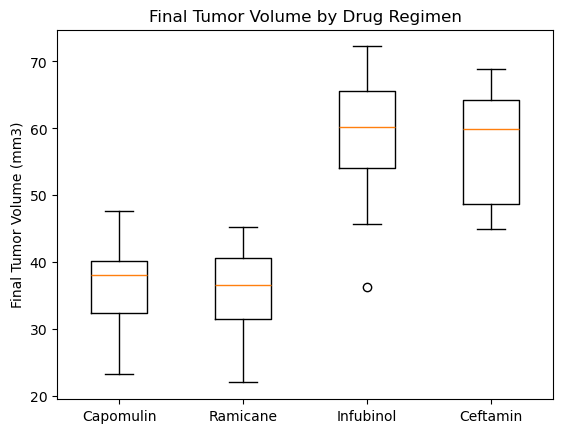

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(drug_list)
boxplot = ax1.boxplot(final_tumor_vol)
plt.show()


## Line and Scatter Plots

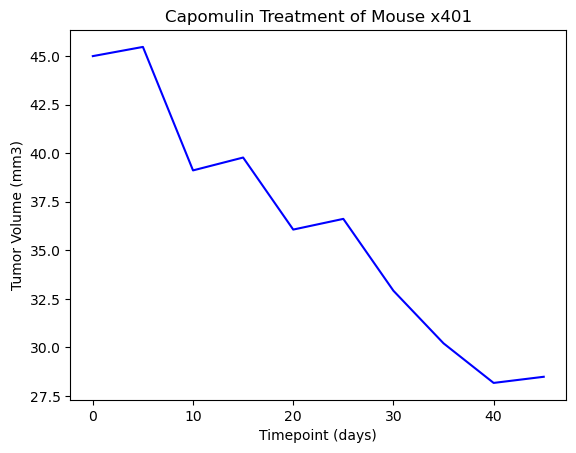

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = clean_mouse_df.loc[clean_mouse_df["Mouse ID"]=="x401",:]
single_tumor_vol = list(single_mouse["Tumor Volume (mm3)"])
fig2, ax2 = plt.subplots()
ax2.set_title("Capomulin Treatment of Mouse x401")
ax2.set_ylabel("Tumor Volume (mm3)")
ax2.set_xlabel("Timepoint (days)")
ax2.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], color="blue")
plt.show()

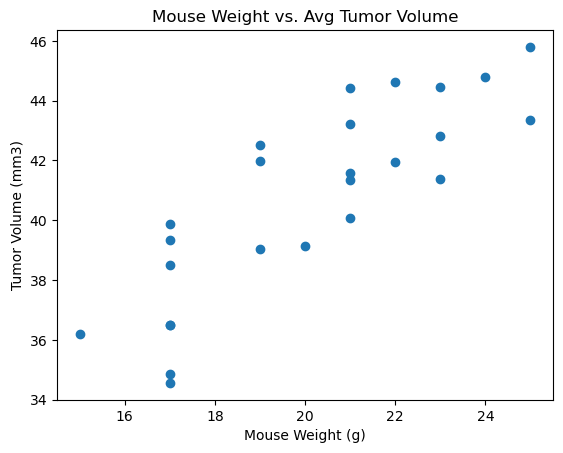

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_reg = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
weight = capomulin_reg["Weight (g)"]
tumor = capomulin_reg["Tumor Volume (mm3)"]
plt.scatter(weight, tumor)
plt.title("Mouse Weight vs. Avg Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.84


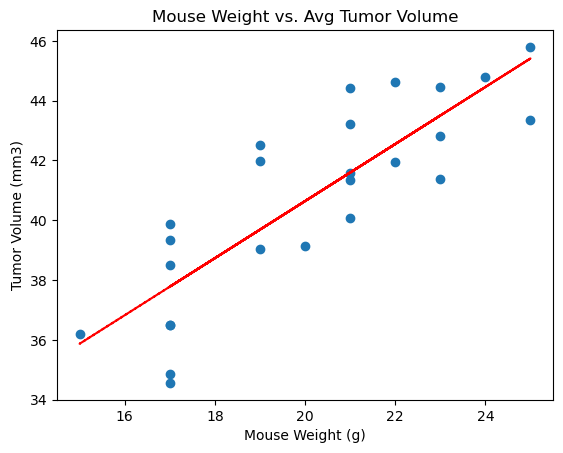

In [41]:
# Calculate the correlation coefficient and a linear regression model 
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(weight, tumor)[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_slope, capomulin_int, capomulin_r, capomulin_p, capomulin_std_err = st.linregress(
    capomulin_reg["Weight (g)"], capomulin_reg["Tumor Volume (mm3)"])
capomulin_fit = capomulin_slope * capomulin_reg["Weight (g)"] + capomulin_int
plt.scatter(weight, tumor)
plt.plot(capomulin_reg["Weight (g)"], capomulin_fit, "--", color="r")
plt.title("Mouse Weight vs. Avg Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
